[Random Forest] Accuracy: 0.8478260869565217
[Random Forest] Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        44
           1       0.88      0.90      0.89        94

    accuracy                           0.85       138
   macro avg       0.83      0.82      0.82       138
weighted avg       0.85      0.85      0.85       138

[SVM] Accuracy: 0.8405797101449275
[SVM] Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.91      0.78        44
           1       0.95      0.81      0.87        94

    accuracy                           0.84       138
   macro avg       0.82      0.86      0.83       138
weighted avg       0.87      0.84      0.85       138



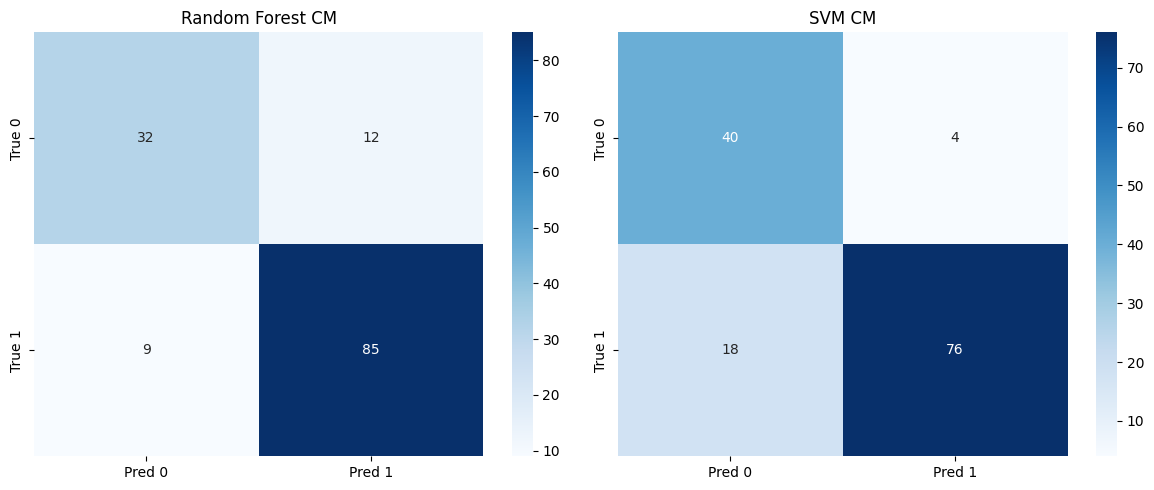

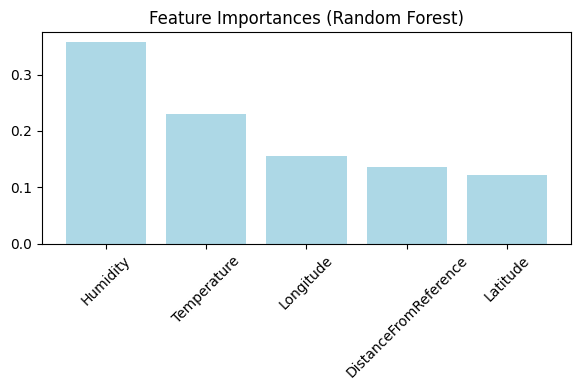

In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    roc_curve, 
    auc
)

data = pd.read_csv("processed_data_2023.csv")

required_columns = ["Latitude", "Longitude", "Humidity", "Temperature", "DistanceFromReference", "Fire"]
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Column {col} not found in data")

X = data[["Latitude", "Longitude", "Humidity", "Temperature", "DistanceFromReference"]]
y = data["Fire"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==========================================================================
# Training Random Forest
# ==========================================================================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

print("[Random Forest] Accuracy:", rf_model.score(X_test, y_test))
print("[Random Forest] Classification Report:")
print(classification_report(y_test, rf_pred))

# ==========================================================================
# Training SVM 
# ==========================================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

svm_model = SVC(probability=True, class_weight='balanced', kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

svm_pred = svm_model.predict(X_test_scaled)
svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

print("[SVM] Accuracy:", svm_model.score(X_test_scaled, y_test))
print("[SVM] Classification Report:")
print(classification_report(y_test, svm_pred))


rf_cm = confusion_matrix(y_test, rf_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(12, 5))

# ---- RF CM ----
plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.title("Random Forest CM")

plt.subplot(1, 2, 2)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.title("SVM CM")

plt.tight_layout()
plt.show()



# ==========================================================================
# 7) Важность признаков для Random Forest
# ==========================================================================
import numpy as np

feature_names = ["Latitude", "Longitude", "Humidity", "Temperature", "DistanceFromReference"]
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6, 4))
plt.bar(range(len(importances)), importances[indices], color='lightblue', align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()
